# Brain Tumour Classification
***
## Table of Contents
***

In [9]:
import torch
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
from torchvision import datasets, transforms
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset, DataLoader, Subset

## 1. Introduction

## 2. Device Agnostic Code
Mac GPU acceleration (`mps` backend) delivers significant speed-up over CPU for deep learning tasks, especially for large models and batch sizes. On Windows, `cuda` is used instead of `mps`.

In [2]:
# DEVICE = torch.device(device="cuda" if torch.cuda.is_available() else "cpu") # For Windows
DEVICE = torch.device(
    device="mps" if torch.backends.mps.is_available() else "cpu"
)  # For MacOS

## 3. Loading Data
Retrieved from [Brain Tumor MRI Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

In [4]:
data_path = Path("_datasets/brain_mri")

if data_path.is_dir():
    print(f"{data_path} directory exists.")
else:
    print(f"{data_path} directory NOT FOUND!")

_datasets/brain_mri directory exists.


In [5]:
def walk_through_dir(dir_path) -> None:
    for (
        directory_path,
        directory_names,
        file_names,
    ) in os.walk(dir_path):
        print(
            f"{len(directory_names)} directories and {len(file_names)} images found in {directory_path}"
        )

In [7]:
walk_through_dir(data_path)

2 directories and 0 images found in _datasets/brain_mri
4 directories and 0 images found in _datasets/brain_mri/Training
0 directories and 1457 images found in _datasets/brain_mri/Training/pituitary
0 directories and 1595 images found in _datasets/brain_mri/Training/notumor
0 directories and 1321 images found in _datasets/brain_mri/Training/glioma
0 directories and 1339 images found in _datasets/brain_mri/Training/meningioma
4 directories and 0 images found in _datasets/brain_mri/Testing
0 directories and 300 images found in _datasets/brain_mri/Testing/pituitary
0 directories and 405 images found in _datasets/brain_mri/Testing/notumor
0 directories and 300 images found in _datasets/brain_mri/Testing/glioma
0 directories and 306 images found in _datasets/brain_mri/Testing/meningioma


## 4. Preparing Data
### Data Transformation

In [ ]:
train_transform = transforms.Compose(
    transforms=[
        transforms.Resize(size=(224, 224)),
        # transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomVerticalFlip(p=0.5),
        # transforms.RandomRotation(degrees=15),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  # ImageNet means
            std=[0.229, 0.224, 0.225],  # ImageNet stds
        ),
    ]
)

test_transform = transforms.Compose(
    transforms=[
        transforms.Resize(size=(224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  # ImageNet means
            std=[0.229, 0.224, 0.225],  # ImageNet stds
        ),
    ]
)

In [22]:
TRAIN_DIR = "_datasets/brain_mri/Training"
TEST_DIR = "_datasets/brain_mri/Testing"
BATCH_SIZE = 32

train_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=train_transform)
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=test_transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [23]:
print(f"Classes: {train_dataset.classes}")
print(f"Classes with indices: {train_dataset.class_to_idx}")

Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Classes with indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


## 5. Understanding Data

In [24]:
def show_images(dataset, class_names, num_images=9):
    plt.figure(figsize=(9, 9))
    cols, rows = 3, 3
    indices = random.sample(population=range(len(dataset)), k=num_images)
    for i, index in enumerate(indices):
        image, label = dataset[index]
        image = image.numpy().transpose((1, 2, 0))  # Convert from CHW to HWC
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.tight_layout()
        plt.axis("off")
    plt.show()

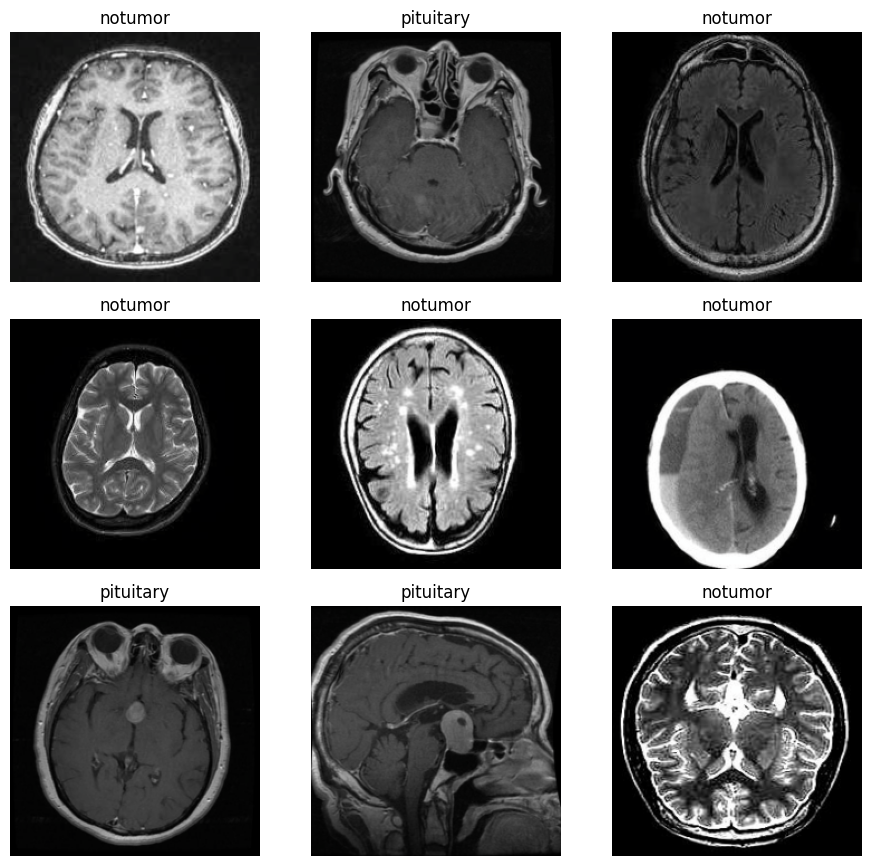

In [ ]:
class_names = train_dataset.classes
show_images(dataset=test_dataset, class_names=class_names)